# Plotting with ``mne.viz.Brain``

## Load data

Use the sample data which is data from a subject being presented auditory and visual stimuli to display the functionality
of `mne.viz.Brain` for plotting data on a brain.



In [1]:
import sys
import os
import numpy as np
import os.path as op
sys.path.append("../")
from mne_path import PathHandler
from glob import glob
ph = PathHandler()

import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

import mne
from mne.datasets import sample

%matplotlib inline

In [2]:
SAMPLE_DATA_DIR = ph.cddir(ph.SAMPLE_DIR)

subjects_dir = op.join(SAMPLE_DATA_DIR, 'subjects')
sample_dir = op.join(SAMPLE_DATA_DIR, 'MEG', 'sample')

Changed to:  /Users/jonghang/mne_data/MNE-sample-data


## Add source information

Plot source information.



In [3]:
brain_kwargs = dict(alpha=0.1, background='white', cortex='low_contrast')

brain = mne.viz.Brain('sample', 
                      subjects_dir =subjects_dir, **brain_kwargs)

stc = mne.read_source_estimate(op.join(sample_dir, 'sample_audvis-meg'))

stc.crop(0.09, 0.1)

kwargs = dict(fmin=stc.data.min(), fmax=stc.data.max(), alpha=0.25,
              smoothing_steps='nearest', time=stc.times)

brain.add_data(stc.lh_data, 
               hemi = 'lh', 
               vertices = stc.lh_vertno,
               **kwargs)

brain.add_data(stc.rh_data, 
               hemi = 'rh', 
               vertices = stc.rh_vertno, 
               **kwargs)

Using pyvistaqt 3d backend.



## Modify the view of the brain

Adjust the view of the brain using ``show_view`` method.

In [ ]:
brain = mne.viz.Brain('sample', subjects_dir=subjects_dir, **brain_kwargs)
brain.show_view(azimuth=190, elevation=70, distance=350, focalpoint=(0, 0, 20))

## Highlight a region on the brain

* o highlight a region of the brain for analyses use the ``add_label`` method.
* Labels are stored in the Freesurfer label directory from the `recon-all` for that subject
* Labels can also be made following the [Freesurfer instructions](https://surfer.nmr.mgh.harvard.edu/fswiki/mri_vol2label)
* In this example, Brodmann Area 44 is shown

<div class="alert alert-info"><h4>Note</h4><p>The MNE sample dataset contains only a subselection of the
          Freesurfer labels created during the ``recon-all``.</p></div>



In [ ]:
brain = mne.viz.Brain('sample', subjects_dir=subjects_dir, **brain_kwargs)
brain.add_label('BA44', hemi='lh', color='green', borders=True)
brain.show_view(azimuth=190, elevation=70, distance=350, focalpoint=(0, 0, 20))

## Include the Head in Visualization

In [4]:
brain = mne.viz.Brain('sample', subjects_dir=subjects_dir, **brain_kwargs)
brain.add_head(alpha=0.5)

Using lh.seghead for head surface.


## Add Sensors Positions

Put the sensors into context the data that generated the source time course (STC)

In [5]:
brain = mne.viz.Brain('sample', subjects_dir=subjects_dir, **brain_kwargs)
evoked = mne.read_evokeds(op.join(sample_dir, 'sample_audvis-ave.fif'))[0]
trans = mne.read_trans(op.join(sample_dir, 'sample_audvis_raw-trans.fif'))
brain.add_sensors(evoked.info, trans)
brain.show_view(distance=500)  # move back to show sensors

Reading /Users/jonghang/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied

## Add current dipoles

Dipole modeling as in `tut-dipole-orientations` can be plotted on the
brain as well.



In [6]:
brain = mne.viz.Brain('sample', subjects_dir=subjects_dir, **brain_kwargs)
dip = mne.read_dipole(op.join(sample_dir, 'sample_audvis_set1.dip'))
cmap = plt.colormaps['YlOrRd']
colors = [cmap(gof / dip.gof.max()) for gof in dip.gof]
brain.add_dipole(dip, trans, colors=colors, scales=list(dip.amplitude * 1e8))
brain.show_view(azimuth=-20, elevation=60, distance=300)
img = brain.screenshot()  # for next section

34 dipole(s) found


## Create a screenshot for exporting the brain image
Also, we can a static image of the brain using ``screenshot`` (above),
which will allow us to add a colorbar. This is useful for figures in
publications.



Text(0.5, 0.98, 'Dipole Fits Scaled by Amplitude and Colored by GOF')

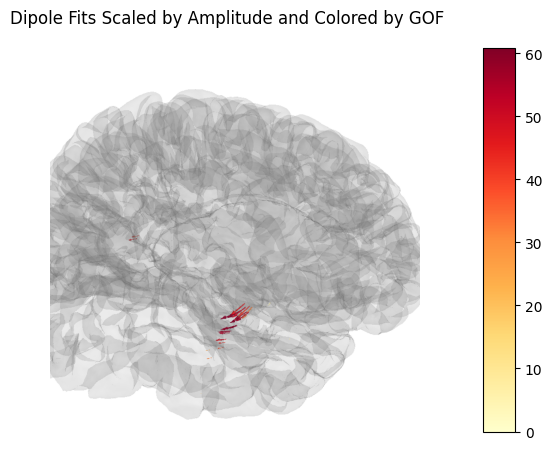

In [7]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
cax = fig.add_axes([0.9, 0.1, 0.05, 0.8])
norm = Normalize(vmin=0, vmax=dip.gof.max())
fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), cax=cax)
fig.suptitle('Dipole Fits Scaled by Amplitude and Colored by GOF')

<pre>
Authors: SIONG Jong Hang 
         jonghang@gmail.com
         Alex Rockhill
         aprockhill@mailbox.org

License: BSD-3-Clause
</pre>